# Taller Gradiente Descendiente.

Implemente las siguientes funciones para desarrollar el algoritmo del gradiente descendente:

* `sigmoide`: funcion sigmoide como funcion de activacion.
* `prediccion`: la formula para la preduccion.
* `error`: la formula para el error en un punto.
* `peso_updt`: la funcion que actualiza lso paramentros con un paso del gradiente descendente.

El objetivo del taller es encontrar la linea optima de clasificacion de los datos.

-Despues de implementar las funciones del grandiente descendente, corra la funcion de entrenamiento. Esto hace que se grafiquen las lineas generadas en cada paso del algortimo del gradiente. Tambien se grafica la funcion error y podra observar como esta disminuye a medida que las epocas se incrementan.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#funciones para graficar y dibujar lineas.

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Leyendo y graficando los datos.

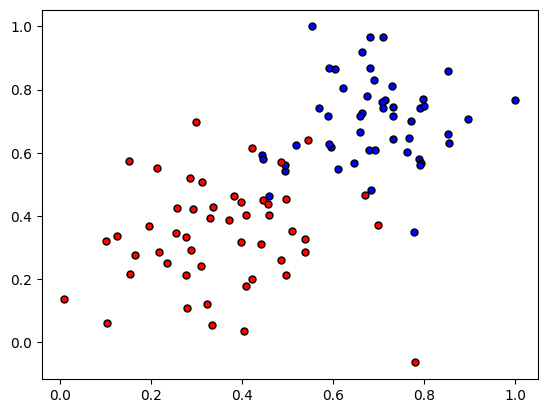

In [2]:
data = pd.read_csv('data2.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

## Funciones basicas a implementar

Implemente las siguientes funciones.
- Funcion de activacion sigmoide

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Prediccion 

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Funcion error

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- Funcion para actualizar los pesos

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [3]:
# Activation (sigmoid) function
def sigmoid(x):
    sig = (1/(1 + np.exp(-x)))
    return sig

# Output (prediction) formula
def prediccion(features, weights, bias):
    s = (weights.dot(features) + bias)
    sig = sigmoid(s)
    return sig 

# Error (log-loss) formula
def error_formula(y, output):
    error = -y*np.log(output) - (1 - y)*np.log(1 - output)
    return error 

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate, output):
    weights = weights - learnrate*(output - y)*x
    bias = bias - learnrate*(output - y)
    return weights, bias

## Funcion de entrenamiento
Esta funcion hace una interacion del algoritmo del gradiente descendente en todos los datos, para un numero determinado de epocas y algunas lineas limite a medida que avanza el algoritmo.

In [6]:
np.random.seed(44)

epochs = 1000
learnrate = 0.1
def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            
            output = prediccion(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate, output)
        
        # Printing out the log-loss error on the training set
        
        out = prediccion(np.transpose(features), weights, bias)
        #out = prediccion(x, weights, bias)
        #loss = np.mean(error_formula(targets, out))
        loss = np.mean(error_formula(y, output))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Entrenamiento del algoritmo
Cuando corremos la funcion, se obtiene lo siguiente:
- 10 actualizaciones con perdidas del entrenamiento actual y precision.
- Un plot de los datos y las lineas de clasficacion que se obtienen. La final queda en negro. Entre mas epocas, las lineas se ajustan cada vez mejor =
- Un plot de la funcion error. Note que a medida que avanza las epocas, esta disminuye.


========== Epoch 0 ==========
Train loss:  0.19702636663520656
Accuracy:  0.5

========== Epoch 100 ==========
Train loss:  0.23797698627901512   WARNING - Loss Increasing
Accuracy:  0.93

========== Epoch 200 ==========
Train loss:  0.21188085252330002
Accuracy:  0.94

========== Epoch 300 ==========
Train loss:  0.19509978244798853
Accuracy:  0.94

========== Epoch 400 ==========
Train loss:  0.18371260647577717
Accuracy:  0.94

========== Epoch 500 ==========
Train loss:  0.1756148210663849
Accuracy:  0.94

========== Epoch 600 ==========
Train loss:  0.16965645334012122
Accuracy:  0.94

========== Epoch 700 ==========
Train loss:  0.16515908939769636
Accuracy:  0.94

========== Epoch 800 ==========
Train loss:  0.16169752634670098
Accuracy:  0.94

========== Epoch 900 ==========
Train loss:  0.15899236188186533
Accuracy:  0.94


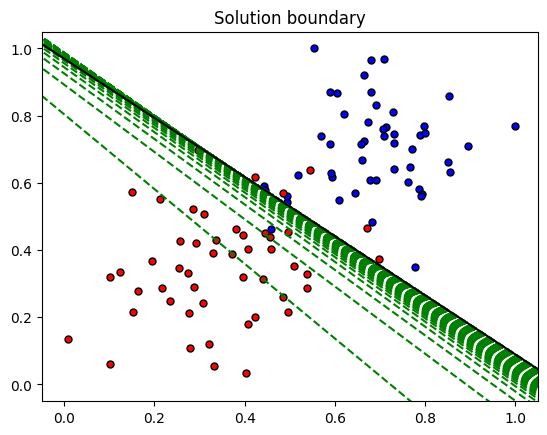

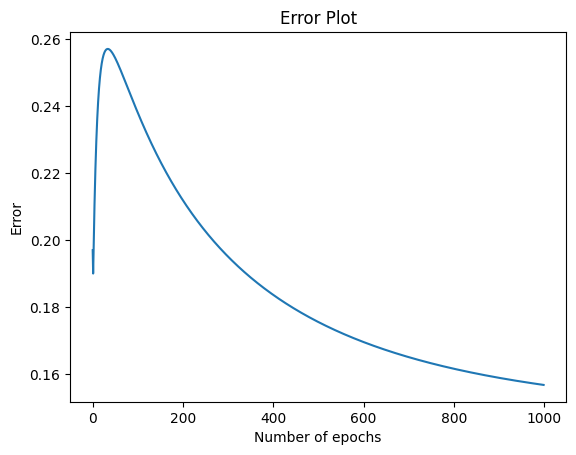

In [7]:
train(X, y, epochs, learnrate, True)